In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("../Biomass_data/train.csv")
df.head()

,sample_id,image_path,Sampling_Date,State,Species,Pre_GSHH_NDVI,Height_Ave_cm,target_name,target
0,ID1011485656__Dry_Clover_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Clover_g,0.0000
1,ID1011485656__Dry_Dead_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Dead_g,31.9984
2,ID1011485656__Dry_Green_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Green_g,16.2751
3,ID1011485656__Dry_Total_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,Dry_Total_g,48.2735
4,ID1011485656__GDM_g,train/ID1011485656.jpg,2015/9/4,Tas,Ryegrass_Clover,0.62,4.6667,GDM_g,16.2750


In [29]:
df["State"].unique()

array(['Tas', 'NSW', 'WA', 'Vic'], dtype=object)

In [30]:
num_cols = df[["Pre_GSHH_NDVI","Height_Ave_cm"]]

In [31]:
num_cols.describe()

,Pre_GSHH_NDVI,Height_Ave_cm
count,1785.000000,1785.000000
mean,0.657423,7.595985
std,0.151972,10.273725
min,0.160000,1.000000
25%,0.560000,3.000000
50%,0.690000,4.000000
75%,0.770000,7.000000
max,0.910000,70.000000


<Axes: >

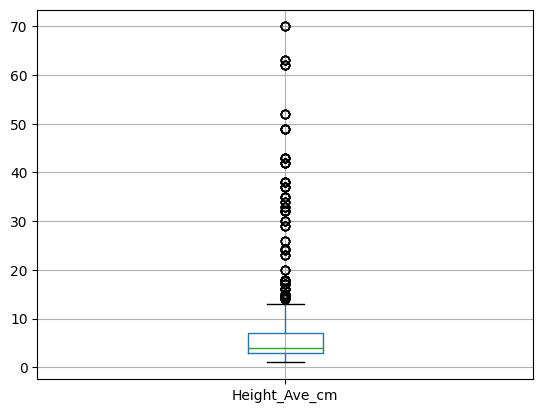

In [36]:
df.boxplot(column = "Height_Ave_cm")

<Axes: >

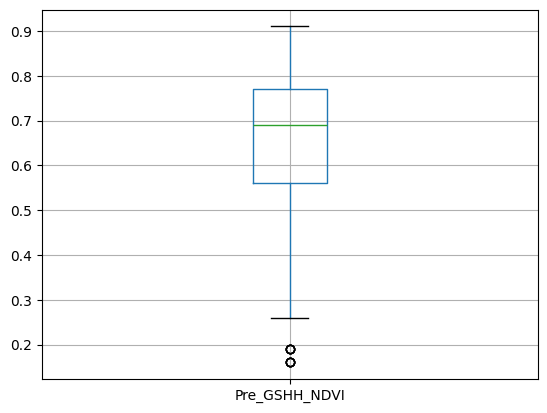

In [35]:
df.boxplot(column = "Pre_GSHH_NDVI")

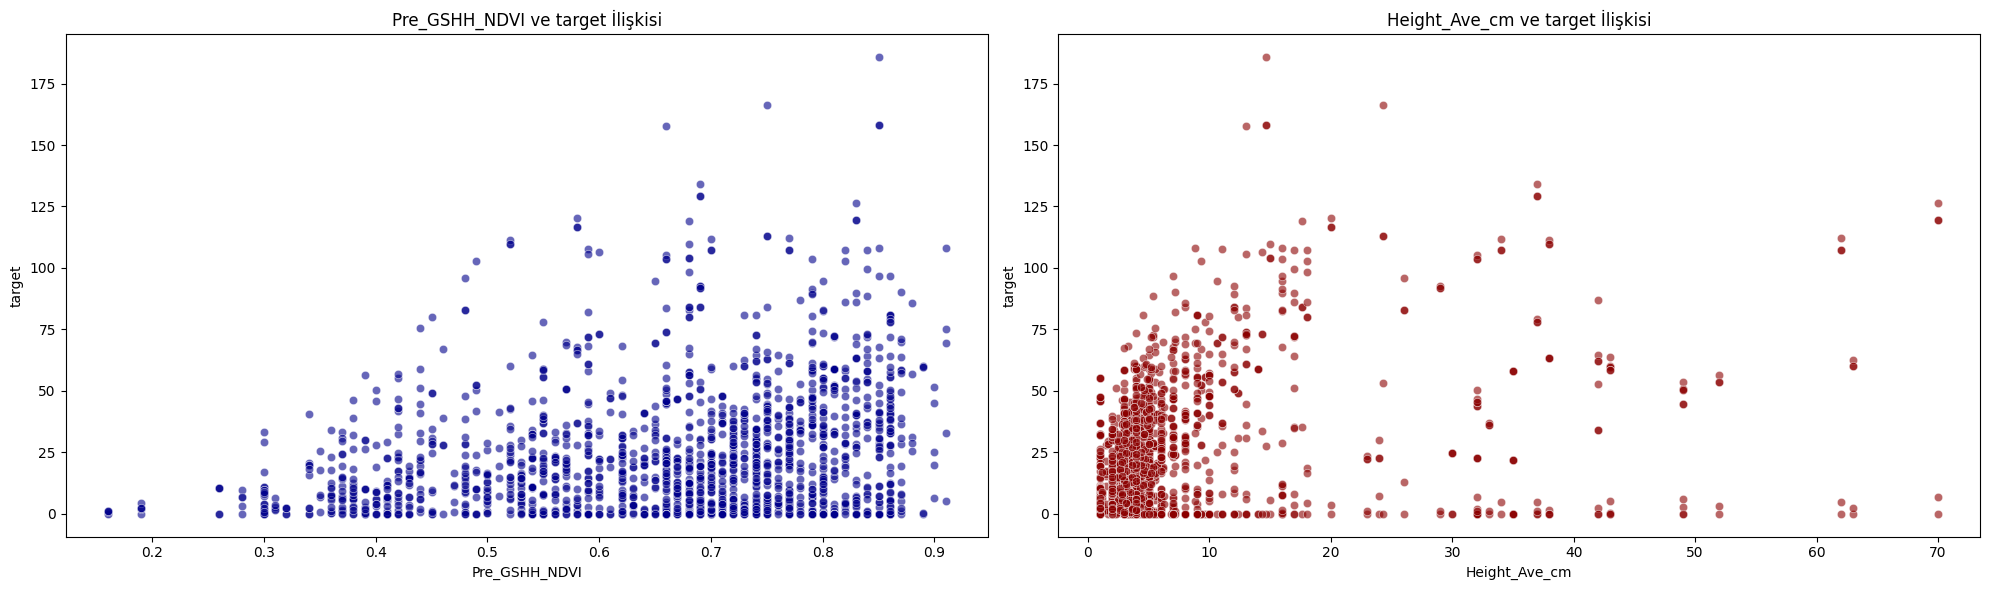

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=df, x='Pre_GSHH_NDVI', y='target', alpha=0.6, color='darkblue', ax=axes[0])
axes[0].set_title('Pre_GSHH_NDVI ve target İlişkisi')
axes[0].set_xlabel('Pre_GSHH_NDVI')
axes[0].set_ylabel('target')

sns.scatterplot(data=df, x='Height_Ave_cm', y='target', alpha=0.6, color='darkred', ax=axes[1]) # Rengi ayırt edilsin diye darkred yaptım
axes[1].set_title('Height_Ave_cm ve target İlişkisi')
axes[1].set_xlabel('Height_Ave_cm')
axes[1].set_ylabel('target')
plt.tight_layout()

In [ ]:
Q1 = num_cols.quantile(0.25)
Q3 = num_cols.quantile(0.75)
IQR = Q3 - Q1

outliers = num_cols[(num_cols < (Q1 - 1.5 * IQR)) | (num_cols > (Q3 + 1.5 * IQR))]

print(outliers.dropna(how="all"))

      Pre_GSHH_NDVI  Height_Ave_cm
5               NaN           16.0
6               NaN           16.0
7               NaN           16.0
8               NaN           16.0
9               NaN           16.0
...             ...            ...
1770            NaN           29.0
1771            NaN           29.0
1772            NaN           29.0
1773            NaN           29.0
1774            NaN           29.0

[225 rows x 2 columns]


In [ ]:
print(outliers)

      Pre_GSHH_NDVI  Height_Ave_cm
0               NaN            NaN
1               NaN            NaN
2               NaN            NaN
3               NaN            NaN
4               NaN            NaN
...             ...            ...
1780            NaN            NaN
1781            NaN            NaN
1782            NaN            NaN
1783            NaN            NaN
1784            NaN            NaN

[1785 rows x 2 columns]


In [ ]:
print("### Outlier Cleaning (Capping) on Numerical Columns ###")

def clip_outliers(df, columns):
    for col in columns:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower=lower, upper=upper)
    return df

df = clip_outliers(df, num_cols.columns)
df.describe()

### Outlier Cleaning (Capping) on Numerical Columns ###


,Pre_GSHH_NDVI,Height_Ave_cm,target
count,1785.000000,1785.000000,1785.000000
mean,0.657899,7.486742,24.782295
std,0.149885,9.710966,25.823738
min,0.280000,1.000000,0.000000
25%,0.560000,3.000000,4.818200
50%,0.690000,4.000000,18.200000
75%,0.770000,7.000000,35.940600
max,0.880000,52.000000,185.700000


In [ ]:
df.to_csv("../Biomass_data/processed/after_eda.csv" , index = False )

In [40]:
df_processed = pd.read_csv("../Biomass_data/processed/after_eda.csv")

<Axes: >

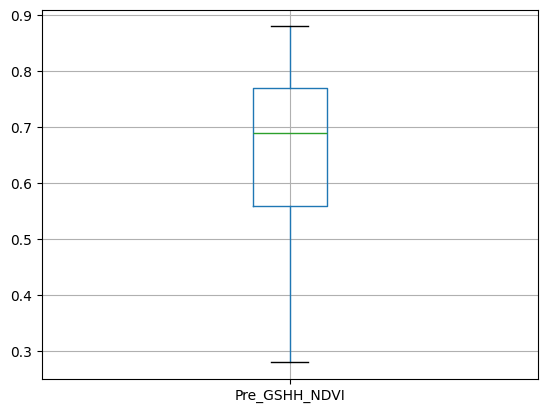

In [42]:
df_processed.boxplot(column = "Pre_GSHH_NDVI")


<Axes: >

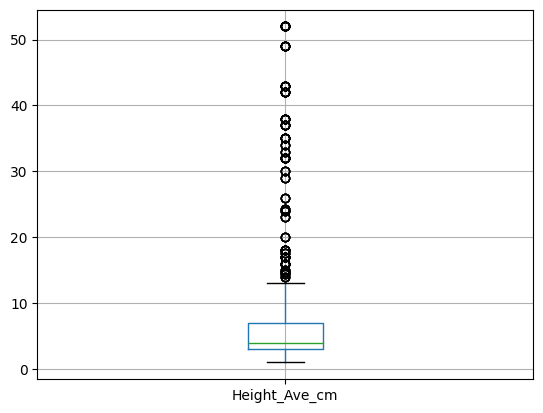

In [43]:
df_processed.boxplot(column = "Height_Ave_cm")